<a href="https://colab.research.google.com/github/Subi00001/Movie_Review_Sentiment_Analysis/blob/main/Movie_Review_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ================================
# IMPORT LIBRARIES
# ================================
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense

# ================================
# LOAD IMDB DATASET
# ================================
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

# ================================
# SEQUENCE PADDING
# ================================
max_len = 200
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

# ================================
# BUILD RNN MODEL
# ================================
rnn_model = Sequential([
    Embedding(vocab_size, 32, input_length=max_len),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

rnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nTraining Simple RNN Model...\n")
rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ================================
# EVALUATE RNN
# ================================
rnn_loss, rnn_acc = rnn_model.evaluate(X_test, y_test)
print("Simple RNN Accuracy:", rnn_acc)


# ================================
# BUILD LSTM MODEL
# ================================
lstm_model = Sequential([
    Embedding(vocab_size, 32, input_length=max_len),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\nTraining LSTM Model...\n")
lstm_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ================================
# EVALUATE LSTM
# ================================
lstm_loss, lstm_acc = lstm_model.evaluate(X_test, y_test)
print("LSTM Accuracy:", lstm_acc)


# ================================
# CUSTOM REVIEW TESTING
# ================================
word_index = imdb.get_word_index()

def encode_review(text):
    encoded = []
    for word in text.lower().split():
        encoded.append(word_index.get(word, 2))
    return sequence.pad_sequences([encoded], maxlen=max_len)

# Enter your review here
review = "The movie was amazing and full of excitement"

review_encoded = encode_review(review)

# Predict using LSTM (better model)
prediction = lstm_model.predict(review_encoded)
print("\nSentiment Score:", prediction[0][0])

if prediction >= 0.5:
    print("Prediction: POSITIVE 🙂")
else:
    print("Prediction: NEGATIVE 🙁")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Simple RNN Model...

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.5549 - loss: 0.6798 - val_accuracy: 0.7874 - val_loss: 0.4695
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.8040 - loss: 0.4343 - val_accuracy: 0.8056 - val_loss: 0.4407
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.8827 - loss: 0.2904 - val_accuracy: 0.7960 - val_loss: 0.4833
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 63ms/step - accuracy: 0.9385 - loss: 0.1707 - val_accuracy: 0.6002 - val_loss: 0.7925
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.8218 - loss: 0.3821 - val_accuracy: 0.7468 - val_loss: 0.6532
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7380 - loss: 0.6595
Simple RNN Accuracy: 0.7421200275421143

Training LSTM Model...

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 142ms/step - accuracy: 0.6754 - loss: 0.5723 - val_accuracy: 0.8500 - val_loss: 0.3524
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 148ms/step - accuracy: 0.9011 - loss: 0.2543 - val

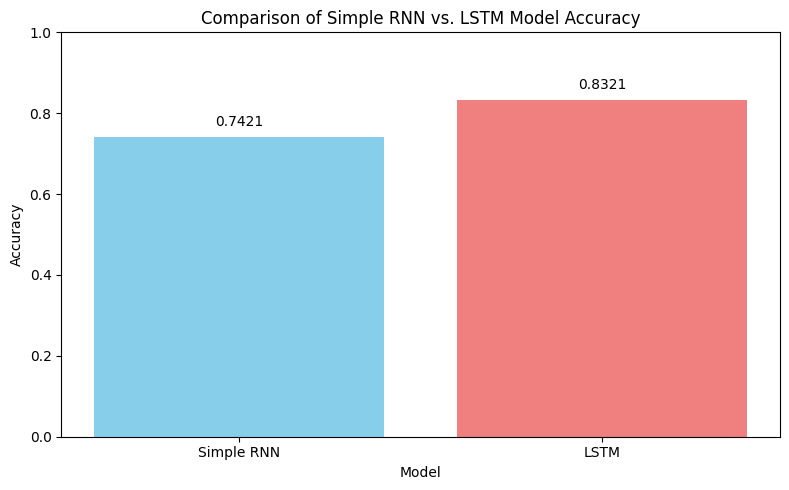

In [2]:
import matplotlib.pyplot as plt

model_names = ['Simple RNN', 'LSTM']
accuracies = [rnn_acc, lstm_acc]

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Simple RNN vs. LSTM Model Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()